volumn&weight, linear regression, 이상치 제거(volume/weight로 30,60)

In [ ]:
# import libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets
import pandas as pd
%matplotlib inline
import io
import json
import csv
import os

from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/뱀장어 평균 중량인식 공모전/data/dataset')

Mounted at /content/drive


train 폴더 124개의 각 평균면적 구하기

In [ ]:
# train 폴더목록 불러오기
folder_list = os.listdir('./train')
folder_list.sort()

#'한 영상 안에서의 뱀장어의 평균 중량' list
Area_list_video=[]
# train 폴더 내 json파일 목록 불러오기
for folder in folder_list:
  path = './train/' + folder
  train_folder_list = os.listdir(path)
  train_folder_list.sort()

  # json 파일만 불러오기
  json_file_list = [file for file in train_folder_list if file.endswith('.json')]

  dict = {}
  #'한 json파일 안의 뱀장어 n마리의 평균 중량' list
  Area_list_json=[]
  # json 파일의 폴리곤 데이터값을 dict로 불러오기
  for json_file in json_file_list:
    with open((path + '/' + json_file),'r') as f:
      dict = json.load(f)
      #print(dict)

    #'한 json파일 안에서 선별된 뱀장어 각각의 중량' list
    Area_list_n = []
    for poly_num in range(len(dict['data'])):
      # 폴리곤 좌표 이용하여 넓이 구하기
      x_point = dict['data'][poly_num]['x']
      y_point = dict['data'][poly_num]['y']

      def PolyArea(x_point,y_point):
        return 0.5*np.abs(np.dot(x_point,np.roll(y_point,1))-np.dot(y_point,np.roll(x_point,1)))

      area=PolyArea(x_point,y_point)
      Area_list_n.append(area)
    avg_area_n = sum(Area_list_n)/len(Area_list_n)
    Area_list_json.append(avg_area_n)
  avg_area_json = sum(Area_list_json)/len(Area_list_json)
  Area_list_video.append(avg_area_json)

In [ ]:
print(Area_list_video)
print(len(Area_list_video))

[1530.0917324117788, 1597.271297701618, 691.3977733148681, 751.3579362399257, 577.4320079431355, 1373.7333301219503, 722.257640719674, 642.4761908775639, 767.1684724861364, 1669.7131727600508, 653.0102271550023, 586.7270497479072, 1677.9273889562432, 1612.6329668181154, 575.3908651989371, 1634.9860768255119, 702.7979240439298, 555.293564216672, 751.0888617911639, 1419.2303985932288, 698.2575879704233, 755.1091718412142, 770.4037900941219, 1747.8408480866724, 1624.9219711434305, 1579.0697968779064, 1887.5133263192092, 800.8338644533775, 1328.9934600970912, 1669.1631794680068, 658.8348555452278, 648.2612531977002, 649.7642645181076, 671.5978727048457, 666.407881313552, 1247.9721791987943, 1337.7768267652675, 777.0840390625112, 689.1927808433122, 715.6707189431547, 1562.6593902670586, 603.247538688205, 1670.665606308423, 1543.41733223879, 731.865402410205, 549.2888564167177, 791.6558482433151, 587.5438656567045, 1668.3070420267907, 606.0141931537775, 748.0393862538499, 786.5446802197157, 

train 124개 폴더의 평균 중량값 얻기

In [ ]:
train_csv = pd.read_csv('./train.csv')
#train_csv 정렬
train_csv=train_csv.sort_values(by='ImageDir', ascending=True)

In [ ]:
AvgWeight = train_csv.loc[:, 'AvgWeight']
AvgWeight

19     72.089286
117    95.033696
8      27.564475
60     45.250000
110    21.020000
         ...    
24     55.283333
123    27.598478
44     47.373636
120    28.102391
29     27.009400
Name: AvgWeight, Length: 124, dtype: float64

In [ ]:
#volumn and Weight (m=밀도,부피 곱)
volumn_list_video=[x**1.5 for x in Area_list_video]
np.corrcoef(volumn_list_video, AvgWeight)[0,1]

0.9162826347692218

In [ ]:
volumn_list_video

[59851.66035986859,
 63836.3476864782,
 18179.91987498708,
 20595.40407198334,
 13875.58431404423,
 50915.92676285111,
 19410.566806463878,
 16284.917287293505,
 21248.88373174472,
 68228.0266069593,
 16687.065651507284,
 14211.966211301135,
 68732.1207971812,
 64759.472219627394,
 13802.076945765333,
 66110.59836831377,
 18631.40922860086,
 13085.308321489263,
 20584.34169966497,
 53466.20474518535,
 18451.15239289648,
 20749.833590490492,
 21383.442149091145,
 73072.3084136504,
 65501.12609591409,
 62748.303749106504,
 82004.00053755836,
 22662.804087802542,
 48448.938440760125,
 68194.31854205065,
 16910.82717127454,
 16505.36362793314,
 16562.799087940275,
 17404.59684042217,
 17203.237575561096,
 44086.67601294455,
 48930.03237560775,
 21662.171172828977,
 18093.02067567061,
 19145.639324267606,
 61772.68647143939,
 14816.421961695381,
 68286.41261762603,
 60635.234215909375,
 19799.162758171293,
 12873.63473480204,
 22274.329335609375,
 14241.654460883234,
 68141.85852226158,
 14

Linear Regression model 적용하기

산점도 그리기

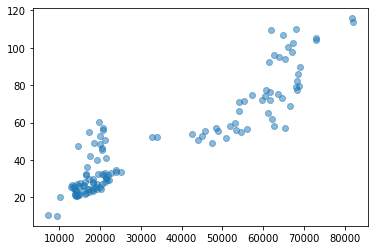

In [ ]:
Vol = torch.Tensor(volumn_list_video)
Weight = torch.Tensor(AvgWeight)
x_train = Vol  # X for model training
x_train = x_train.reshape(-1,1)
y_train = Weight   # y label

plt.scatter(x_train, y_train, alpha=0.5)

이상치 제거

In [ ]:
data = {'volumn/weight':volumn_list_video/AvgWeight}
df = pd.DataFrame(data)
df

,volumn/weight
19,830.243493
117,671.723300
8,659.541670
60,455.147051
110,660.113431
...,...
24,829.147965
123,549.631446
44,308.623580
120,647.045965


In [ ]:
def get_outlier(df=None, column=None, weight=2):
  quantile_30 = np.percentile(df[column].values, 30)
  quantile_60 = np.percentile(df[column].values, 60)

  IQR = quantile_60 - quantile_30
  IQR_weight = IQR*weight
  
  lowest = quantile_30 - IQR_weight
  highest = quantile_60 + IQR_weight
  
  outlier_idx = df[column][ (df[column] <= lowest) | (df[column] >= highest) ].index
  return outlier_idx

# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=df, column='volumn/weight', weight=2)
df.drop(outlier_idx, axis=0, inplace=True)

In [ ]:
df

,volumn/weight
19,830.243493
117,671.723300
8,659.541670
60,455.147051
110,660.113431
...,...
52,609.215157
24,829.147965
123,549.631446
120,647.045965


In [ ]:
df_w= pd.DataFrame(AvgWeight)
a=df_w.index
df_w.drop(outlier_idx, axis=0, inplace=True)
df_v= pd.DataFrame({'Volume': volumn_list_video}, index=a)
df_v.drop(outlier_idx, axis=0, inplace=True)

In [ ]:
df_w

,AvgWeight
19,72.089286
117,95.033696
8,27.564475
60,45.250000
110,21.020000
...,...
52,106.665217
24,55.283333
123,27.598478
120,28.102391


In [ ]:
df_v

,Volume
19,59851.660360
117,63836.347686
8,18179.919875
60,20595.404072
110,13875.584314
...,...
52,64982.067207
24,45838.063318
123,15168.991518
120,18183.538903


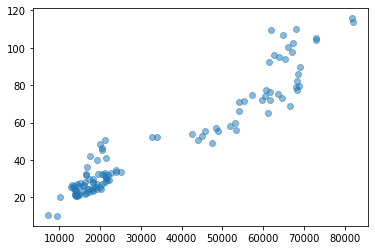

In [ ]:
Vol = torch.Tensor(df_v['Volume'])
Weight = torch.Tensor(df_w['AvgWeight'])
x_train = Vol  # X for model training
x_train = x_train.reshape(-1,1)
y_train = Weight   # y label

plt.scatter(x_train, y_train, alpha=0.5)

model import

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

w1=lm.coef_
b=lm.intercept_

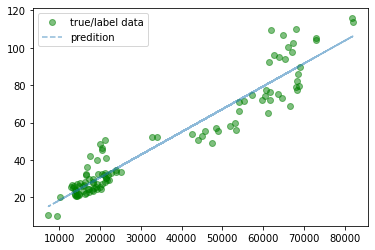

In [ ]:
y_fit = w1*df_v['Volume'] + b
plt.clf()
plt.plot(x_train, y_train, 'go', label='true/label data', alpha=0.5) 
plt.plot(x_train, y_fit, '--', label='predition', alpha=0.5)
plt.legend(loc='best')
plt.show()

x_test만들기

In [ ]:
# test 폴더목록 불러오기
folder_list_t = os.listdir('./test')
folder_list_t.sort()

#'한 영상 안에서의 뱀장어의 평균 중량' list
Area_list_video_t=[]
# test 폴더 내 json파일 목록 불러오기
for folder in folder_list_t:
  path = './test/' + folder
  test_folder_list = os.listdir(path)
  test_folder_list.sort()

  # json 파일만 불러오기
  json_file_list_t = [file for file in test_folder_list if file.endswith('.json')]

  dict_t = {}
  #'한 json파일 안의 뱀장어 n마리의 평균 중량' list
  Area_list_json_t=[]
  # json 파일의 폴리곤 데이터값을 dict로 불러오기
  for json_file in json_file_list_t:
    with open((path + '/' + json_file),'r') as f:
      dict_t = json.load(f)
      #print(dict)

    #'한 json파일 안에서 선별된 뱀장어 각각의 중량' list
    Area_list_n_t = []
    for poly_num in range(len(dict_t['data'])):
      # 폴리곤 좌표 이용하여 넓이 구하기
      x_point = dict_t['data'][poly_num]['x']
      y_point = dict_t['data'][poly_num]['y']

      def PolyArea(x_point,y_point):
        return 0.5*np.abs(np.dot(x_point,np.roll(y_point,1))-np.dot(y_point,np.roll(x_point,1)))

      area=PolyArea(x_point,y_point)
      Area_list_n_t.append(area)
    avg_area_n_t = sum(Area_list_n_t)/len(Area_list_n_t)
    Area_list_json_t.append(avg_area_n_t)
  avg_area_json_t = sum(Area_list_json_t)/len(Area_list_json_t)
  Area_list_video_t.append(avg_area_json_t)

In [ ]:
print(Area_list_video_t)
print(len(Area_list_video_t))

[662.4375370492812, 1708.7593173932387, 722.6720194970871, 663.7034483771207, 651.8044991189411, 568.8820669038878, 449.0646247493141, 1555.7210654514797, 726.4515932811953, 1618.9268529672943, 852.5906718135408, 1477.721343682583, 683.5192306434601, 1404.848888359753, 1342.6419857565306, 1724.0989784845353, 1799.156835956846, 1549.842560918113, 659.2050511774631, 648.6561225006251, 710.2440765257314, 703.7969545842535, 788.3841408263247, 1594.0854149255838, 725.183092149861, 742.4681457550467, 660.4892974873356, 1668.1238624589685, 1335.512175980922, 424.50283346379854, 398.9088482113063, 1981.4615247866811, 2017.282951770889, 672.1646101277685, 1629.9703960860122, 563.1109237578697, 1584.37277777866, 750.2532702290229, 1337.5697349176455, 619.4525751493973, 1565.5974483164375, 1067.356613563529, 779.2684541988293, 466.88742173619397, 1372.7004378427744, 750.4835997966347, 1435.9604387000663, 1714.457522921118, 1579.0697968779064, 1787.0966609367786, 609.4402469741007, 626.30569214866

In [ ]:
volumn_list_video_t=[x**1.5 for x in Area_list_video_t]

In [ ]:
Vol_t = torch.Tensor(volumn_list_video_t)
x_test = Vol_t  # X for model training
x_test = x_test.reshape(-1,1)

예측하기

In [ ]:
predictions = lm.predict(x_test)

csv파일 만들기

In [ ]:
data = {'ImageDir':folder_list_t, 'AvgWeight':predictions}
 
df = pd.DataFrame(data)
df

,ImageDir,AvgWeight
0,1I2EkxetCZ,26.988798
1,31PsozUNAW,92.315826
2,3AT4ivS98X,29.887306
3,49UmJQBya0,27.048405
4,4SJmIOpm84,26.490353
...,...,...
80,xZQH4hLHot,27.512850
81,xwlBbazGdz,36.799225
82,ya75FdleJX,88.920425
83,yyYdnAwplY,87.925156


In [ ]:
csv_path = '/content/drive/MyDrive/뱀장어'
df.to_csv(csv_path+'/test.csv')